In [1]:
import numpy as np
import matplotlib.pyplot as plt

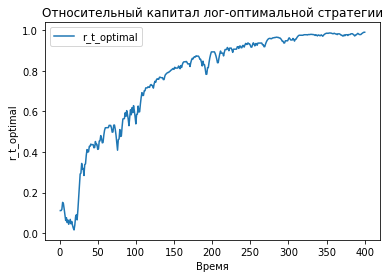

In [28]:


p=2/3
matr_lambd_t=np.array([[i/10,1-i/10] for i in range(1,10)])



def get_next_game_state(vect_Wt):
    Wt=np.sum(vect_Wt)
    x=np.random.random()
    if (x<=1-p):
        st=[1,0]
    elif (x>1-p and x<=2-2*p):
        st=[0,1]
    else:
        st=[1,1]
    at=list(map(lambda k: st[k]==1, np.arange(len(st))))
    bt=at
    mut=(matr_lambd_t*vect_Wt.reshape(9,1)).sum(axis=0)/Wt
    Atp1=at+bt*mut
    vect_Wtp1=((matr_lambd_t*Atp1.T/mut.T).sum(axis=1).T)*vect_Wt/Wt
    return vect_Wtp1, mut

mas_relative_captital_of_optimal=[]
mas_mut=[]
mas_vect_rt=[]

T=401
for i in range(1,T):
    if (i==1):
        vect_Wt=np.ones(9)
        mut=(matr_lambd_t*vect_Wt.reshape(9,1)).sum(axis=0)/vect_Wt.sum()
    else:
        vect_Wt,mut=get_next_game_state(vect_Wt)
    vect_rt=vect_Wt/vect_Wt.sum()
    #print("i=",vect_Wt)
    mas_relative_captital_of_optimal.append(vect_rt[4])
    mas_mut.append(mut[0])
    mas_vect_rt.append(vect_rt)
    
#fig,ax=plt.subplots(1,3)
plt.plot(np.arange(1,T),np.array(mas_vect_rt)[:,4],label='r_t_optimal')
#plt.plot(np.arange(1,T),mas_mut,label='mu_t')
plt.xlabel('Время')
plt.ylabel('r_t_optimal')
plt.title('Относительный капитал лог-оптимальной стратегии')
plt.legend()
plt.show()

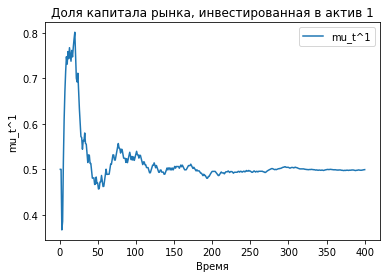

In [29]:
plt.plot(np.arange(1,T),mas_mut,label='mu_t^1')
plt.xlabel('Время')
plt.ylabel('mu_t^1')
plt.title('Доля капитала рынка, инвестированная в актив 1')
plt.legend()
plt.show()

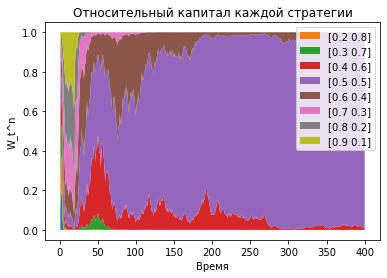

In [31]:
m=np.array(mas_vect_rt).T.cumsum(axis=0)
plt.fill_between(np.arange(1,T),m[0,:])
for i in range(1,9):
    plt.fill_between(np.arange(1,T),m[i-1,:],m[i,:],label=str(matr_lambd_t[i,:]))
plt.xlabel('Время')
plt.ylabel('W_t^n')
plt.title('Относительный капитал каждой стратегии')
plt.legend()
plt.show()

In [ ]:
m=np.array([1,1,1,0,1,1,0,0,1]).reshape(3,3)
m